# **Multiple Linear Regression Analysis on Toyota Corolla Dataset**

**This notebook performs a multiple linear regression (MLR) analysis on the Toyota Corolla dataset. The process includes:**

**1. Exploratory Data Analysis (EDA)**

**2. Data Preprocessing**

**3. MLR Implementation**

## **Import Libraries**

**We will start by importing the necessary libraries for our analysis.**

In [200]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

## **Load and Display the Dataset**

**We will load the dataset and display the first few rows to understand its structure.**


In [201]:
# Load the dataset
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataset
print(df)

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3  

##**Exploratory Data Analysis (EDA)**

**We will perform EDA to gain insights into the dataset. This includes summary statistics, data types, and checking for missing values.**


In [202]:
# Display summary statistics of the dataset
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [203]:
# Display data types of each column
print(df.dtypes)

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [204]:
# Check for missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

##**Visualizing the Distribution of Numerical Variables**

**We will plot the distribution of numerical variables to understand their distributions.**


In [205]:
# Drop the 'Fuel_Type' column for numerical analysis
df_numerical = df.drop(['Fuel_Type'], axis=1)

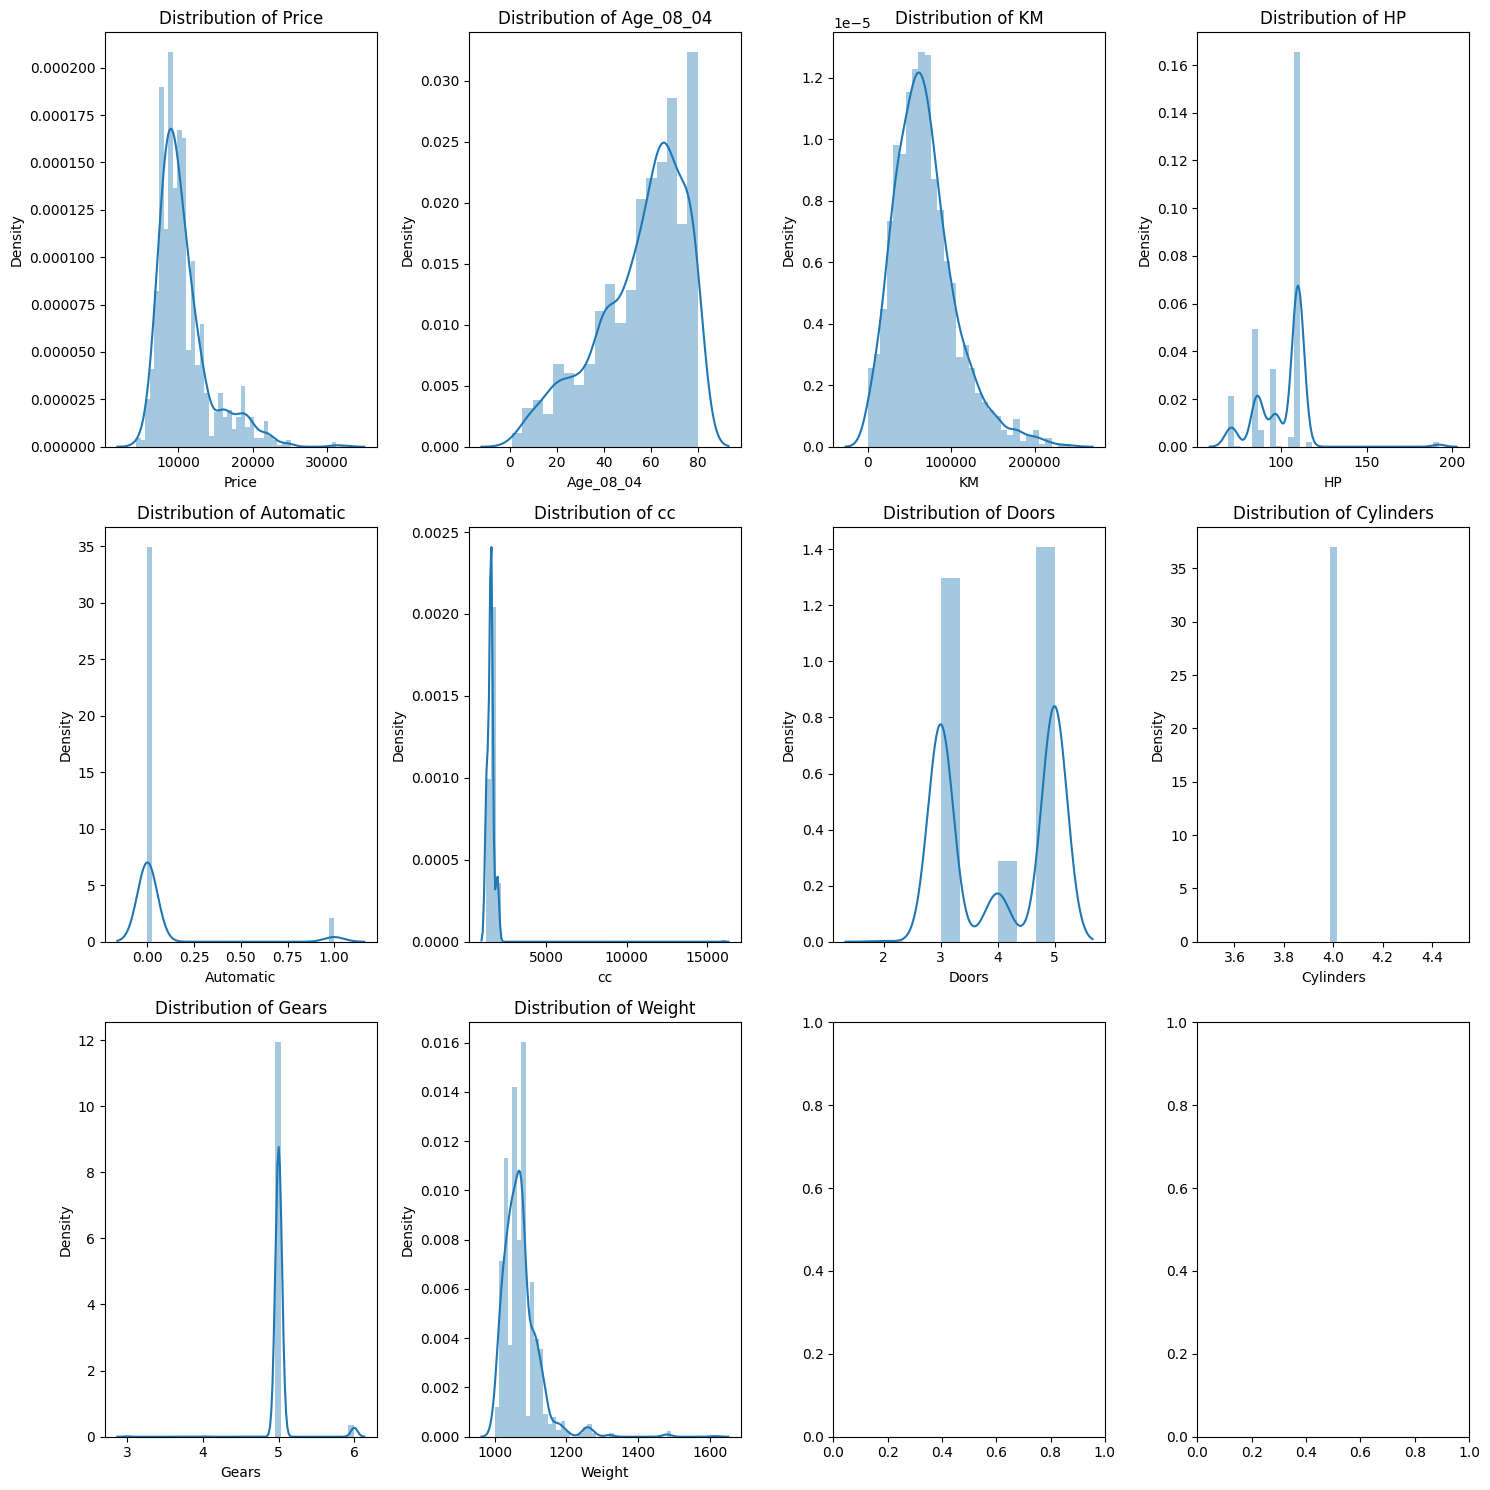

In [206]:
# Set up for subplots: 3 rows and 4 columns
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

# Plot distribution of numerical variables
for i, column in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

<Axes: >

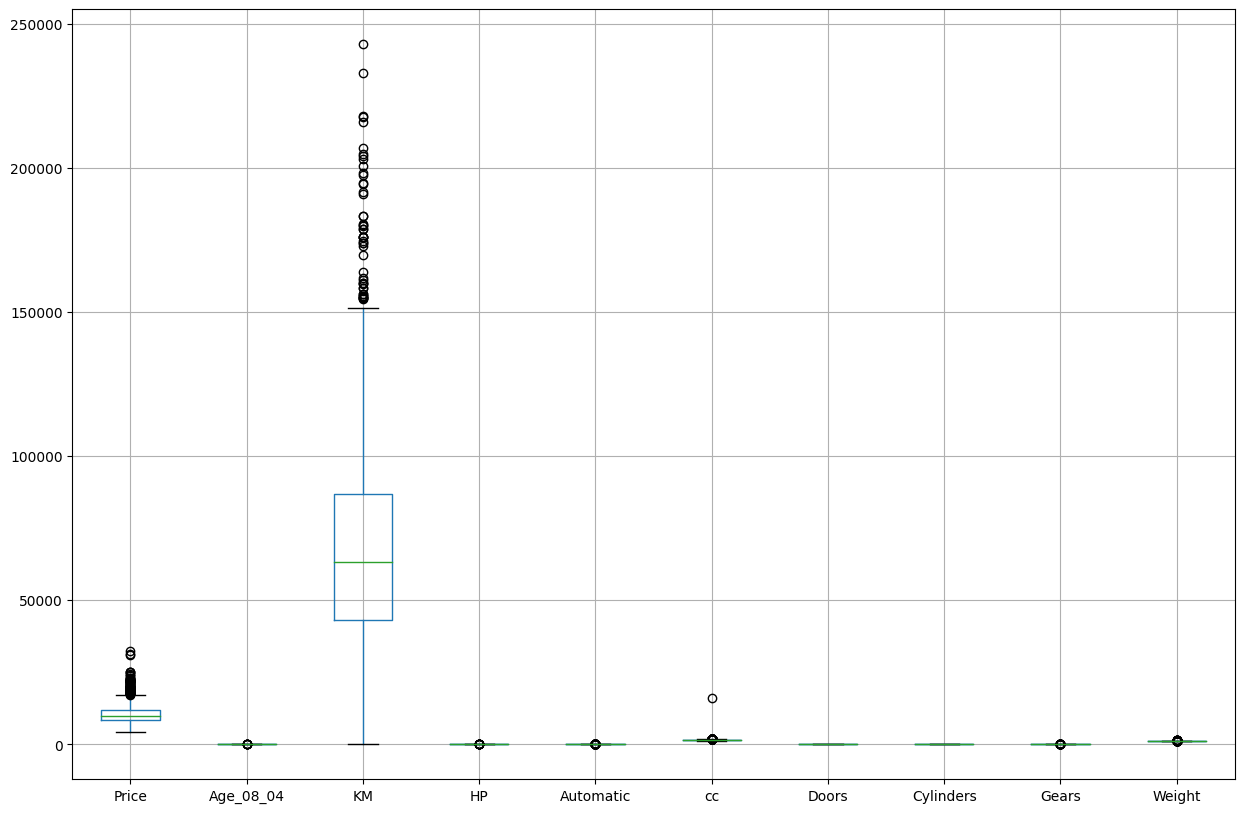

In [207]:
# Plot boxplot of the dataset
plt.figure(figsize=(15, 10))
df.boxplot()

##**Outlier Detection and Capping**

**We will detect and cap outliers in the dataset to minimize their impact on the model.**


In [208]:
# Function for outlier detection and capping
def outlier_detection_and_capping(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1

    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    print(f"Lower Extreme : {lower_extreme}\nUpper Extreme : {upper_extreme}")

    outliers = data[(data[colname] < lower_extreme) | (data[colname] > upper_extreme)]

    # Capping the outliers
    data.loc[data[colname] > upper_extreme, colname] = upper_extreme
    data.loc[data[colname] < lower_extreme, colname] = lower_extreme

    return lower_extreme, upper_extreme, outliers

In [209]:
# Create a copy of the numerical DataFrame for cleaning
df_cleaned = df_numerical.copy()

# Drop unnecessary columns
df_cleaned.drop(['Automatic', 'Cylinders', 'Gears'], axis=1, inplace=True)

In [210]:
# List of columns to check for outliers
columns_to_check = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']

# Detect and cap outliers for each column
for col in columns_to_check:
    lower_extreme, upper_extreme, outliers = outlier_detection_and_capping(df_cleaned, col)
    print(f"Outliers in {col}:\n", outliers)
    print(f"Updated DataFrame after capping {col}:\n", df_cleaned)

Lower Extreme : 3200.0
Upper Extreme : 17200.0
Outliers in Price:
      Price  Age_08_04     KM   HP    cc  Doors  Weight
7    18600         30  75889   90  2000      3    1245
8    21500         27  19700  192  1800      3    1185
10   20950         25  31461  192  1800      3    1185
11   19950         22  43610  192  1800      3    1185
12   19600         25  32189  192  1800      3    1185
..     ...        ...    ...  ...   ...    ...     ...
182  21125          2    225   97  1400      5    1110
183  21500          2     15  110  1600      5    1130
184  17795          1      1   98  1400      4    1100
185  18245          1      1  110  1600      5    1075
523  18950         49  49568  110  1600      3    1105

[110 rows x 7 columns]
Updated DataFrame after capping Price:
       Price  Age_08_04     KM   HP    cc  Doors  Weight
0     13500         23  46986   90  2000      3    1165
1     13750         23  72937   90  2000      3    1165
2     13950         24  41711   90  2000 

<Axes: >

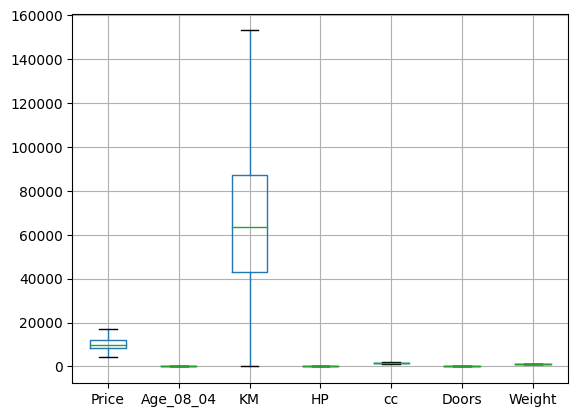

In [211]:
# Plot boxplot after capping outliers
df_cleaned.boxplot()

##**Correlation Analysis**

**We will analyze the correlations between numerical variables.**

In [212]:
# Display correlation matrix
df_cleaned.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Weight
Price,1.000000,-0.895728,-0.608832,0.255640,0.132106,0.184211,0.509536
Age_08_04,-0.895728,1.000000,0.531839,-0.131284,-0.139771,-0.148137,-0.478225
KM,-0.608832,0.531839,1.000000,-0.330495,0.255855,-0.037677,-0.001489
HP,0.255640,-0.131284,-0.330495,1.000000,0.099605,0.120844,0.026578
cc,0.132106,-0.139771,0.255855,0.099605,1.000000,0.139616,0.718655
Doors,0.184211,-0.148137,-0.037677,0.120844,0.139616,1.000000,0.381955
Weight,0.509536,-0.478225,-0.001489,0.026578,0.718655,0.381955,1.000000


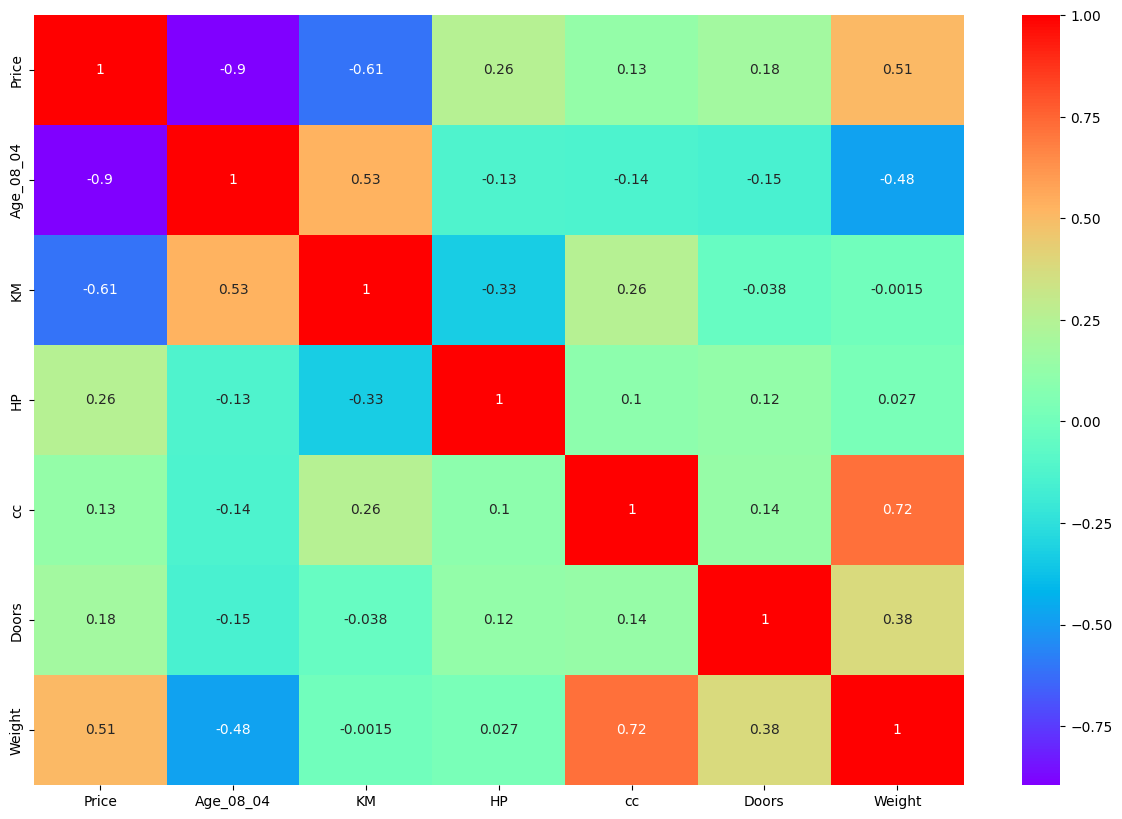

In [213]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='rainbow')
plt.show()

##**Data Preprocessing**

**We will preprocess the data by handling categorical variables and scaling the features.**


In [214]:
# Create a copy of the cleaned DataFrame for further processing
df_cleaned_2 = df_cleaned.copy()

# Add the columns from the original DataFrame to the cleaned DataFrame
df_cleaned_2['Automatic'] = df['Automatic']
df_cleaned_2['Gears'] = df['Gears']
df_cleaned_2['Fuel_Type'] = df['Fuel_Type']

# Display the cleaned DataFrame with added columns
df_cleaned_2

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Automatic,Gears,Fuel_Type
0,13500,23,46986.0,90,1900,3,1152.5,0,5,Diesel
1,13750,23,72937.0,90,1900,3,1152.5,0,5,Diesel
2,13950,24,41711.0,90,1900,3,1152.5,0,5,Diesel
3,14950,26,48000.0,90,1900,3,1152.5,0,5,Diesel
4,13750,30,38500.0,90,1900,3,1152.5,0,5,Diesel
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,86,1300,3,1025.0,0,5,Petrol
1432,10845,72,19000.0,86,1300,3,1015.0,0,5,Petrol
1433,8500,71,17016.0,86,1300,3,1015.0,0,5,Petrol
1434,7250,70,16916.0,86,1300,3,1015.0,0,5,Petrol


##**Convert Categorical Variables to Dummy Variables**

**We will convert the categorical 'Fuel_Type' column to dummy variables for regression analysis.**


In [215]:
# Convert categorical 'Fuel_Type' column to dummy variables
df_dummies = pd.get_dummies(data=df_cleaned_2, columns=['Fuel_Type'])
df_dummies = df_dummies.astype(int)

# Display the DataFrame with dummy variables
df_dummies

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Automatic,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,1900,3,1152,0,5,0,1,0
1,13750,23,72937,90,1900,3,1152,0,5,0,1,0
2,13950,24,41711,90,1900,3,1152,0,5,0,1,0
3,14950,26,48000,90,1900,3,1152,0,5,0,1,0
4,13750,30,38500,90,1900,3,1152,0,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,1025,0,5,0,0,1
1432,10845,72,19000,86,1300,3,1015,0,5,0,0,1
1433,8500,71,17016,86,1300,3,1015,0,5,0,0,1
1434,7250,70,16916,86,1300,3,1015,0,5,0,0,1


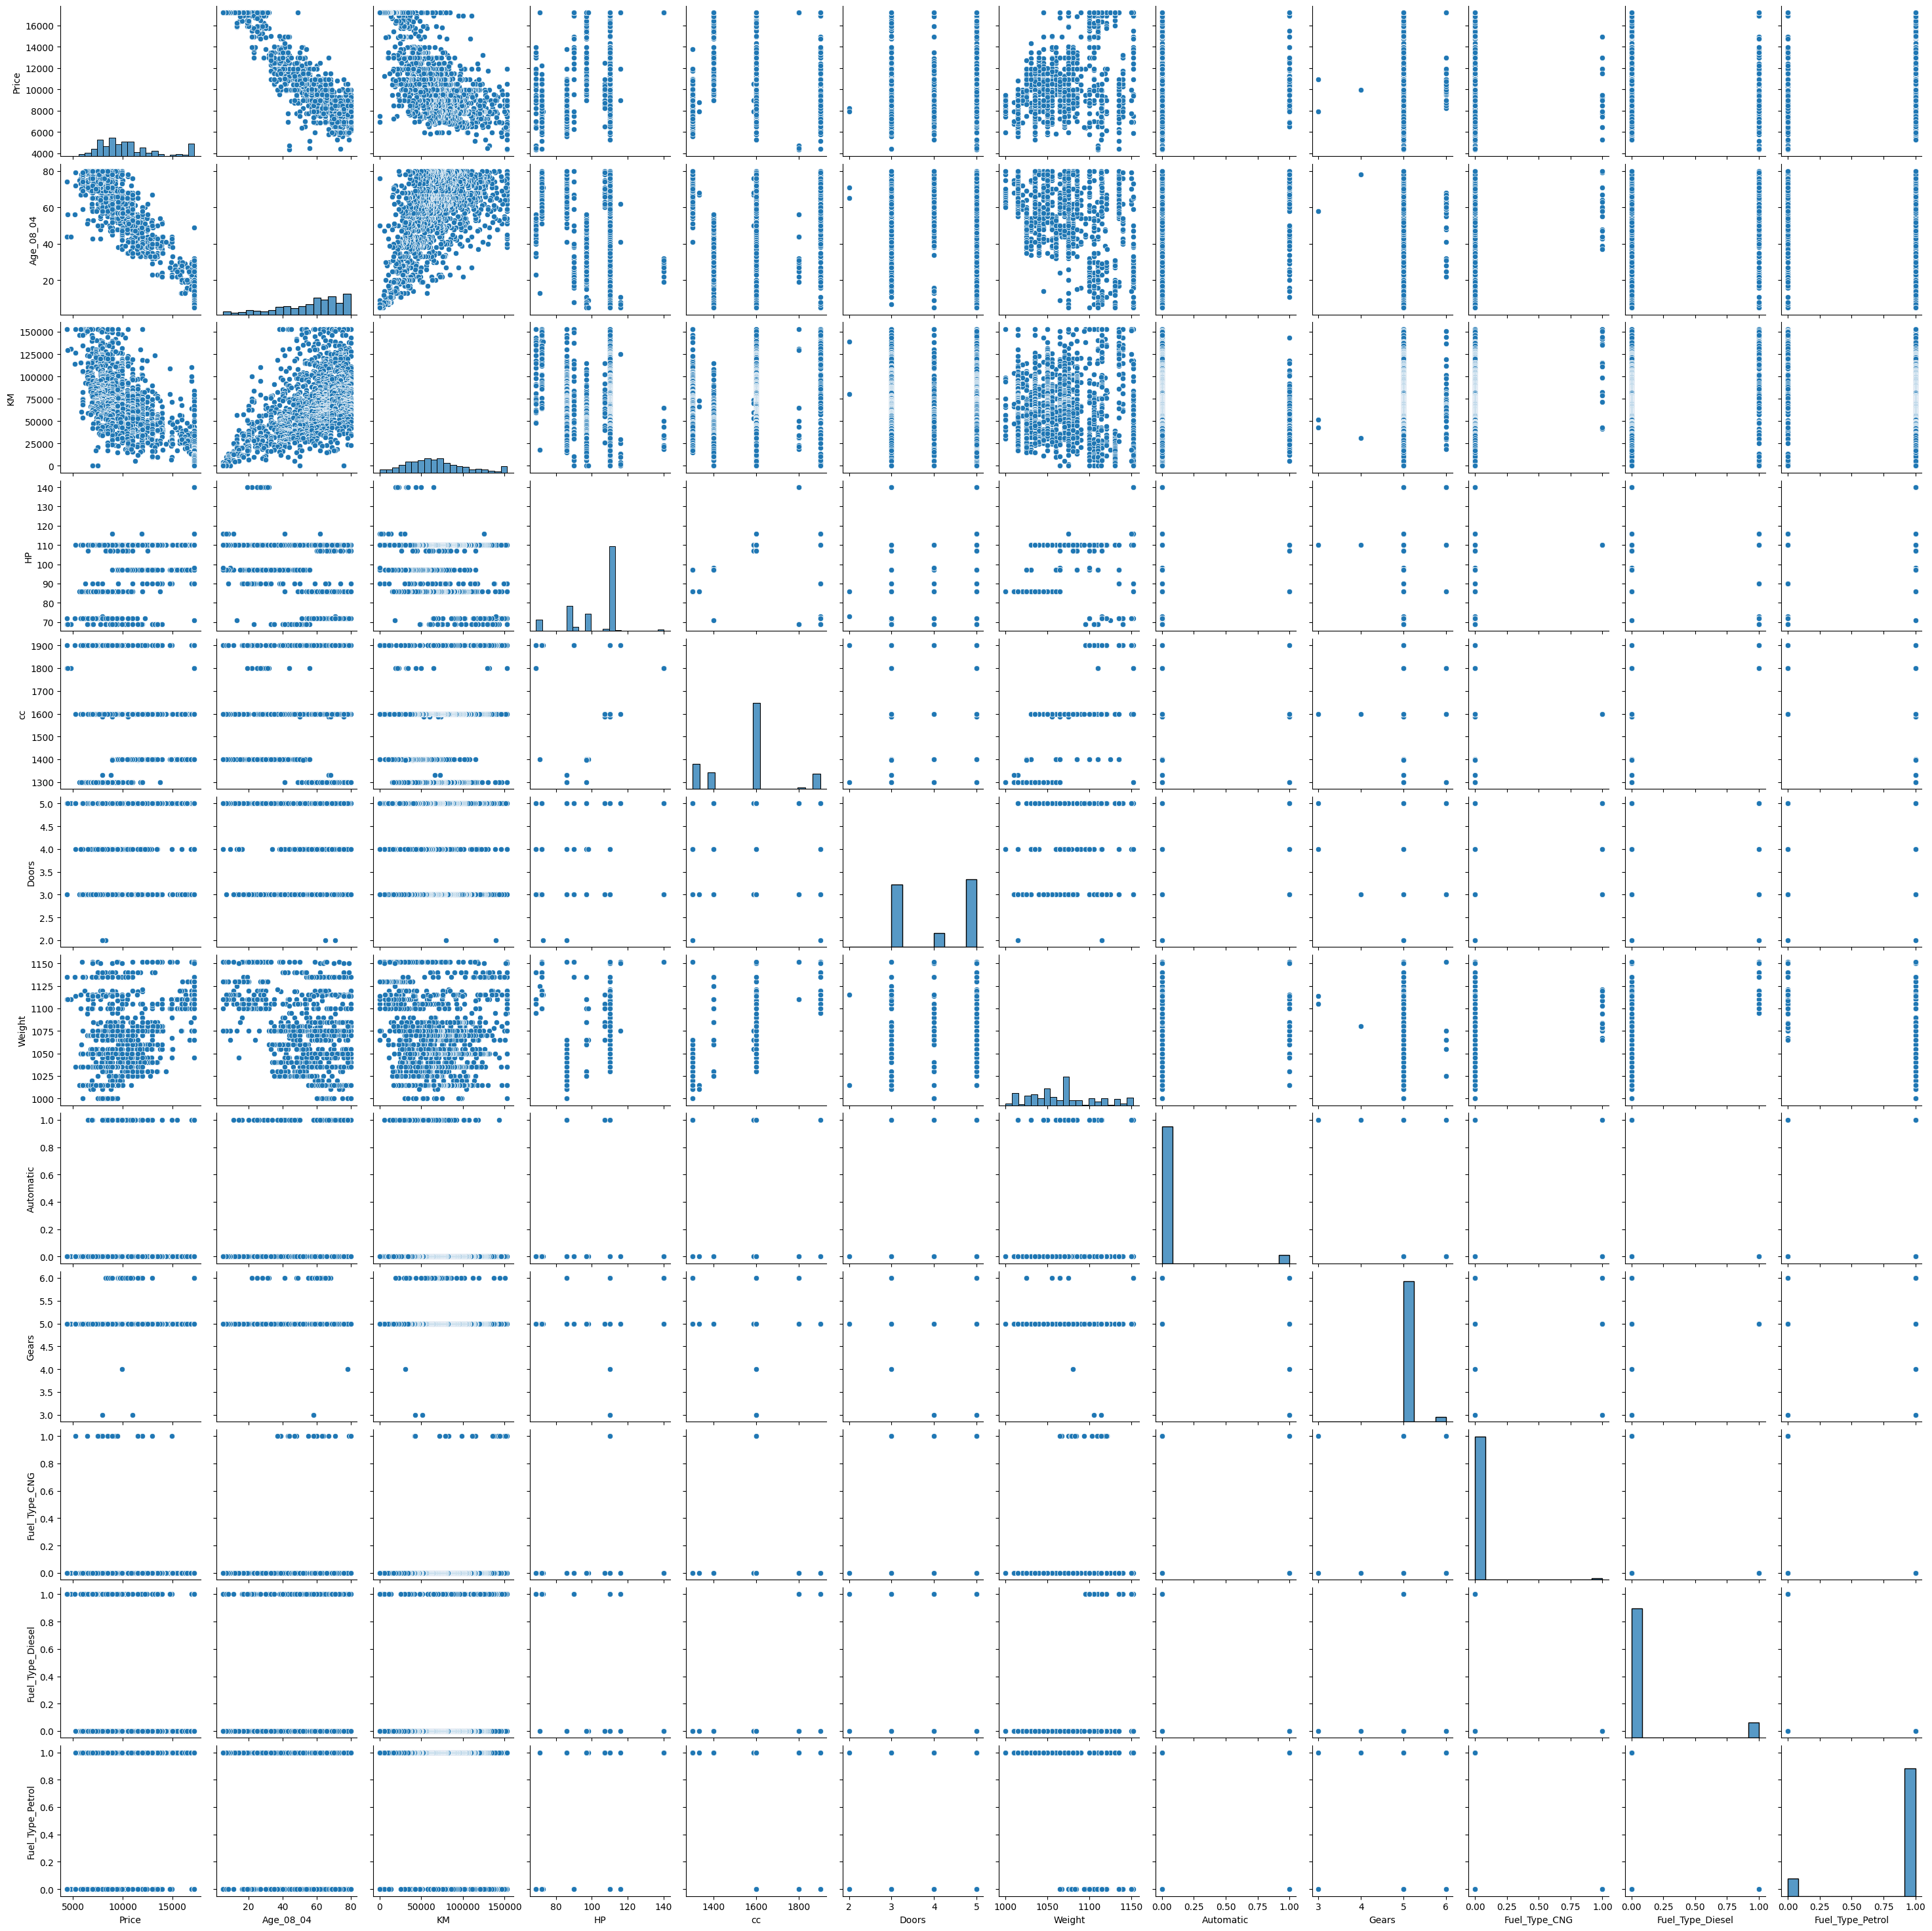

In [216]:
sns.pairplot(df_dummies)
plt.show()

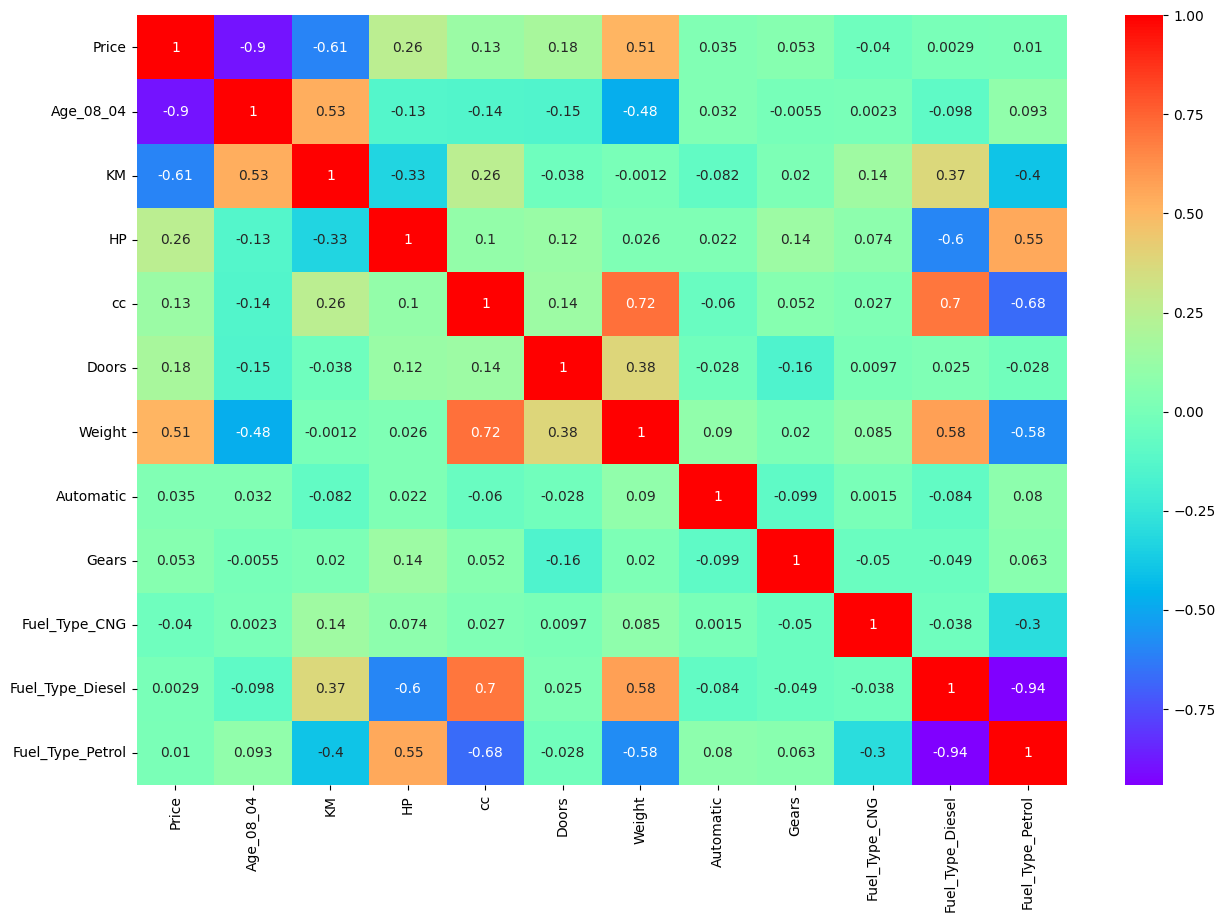

In [217]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_dummies.corr(), annot=True, cmap='rainbow')
plt.show()

## **Split the Dataset into Training and Testing Sets**

In [218]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Data preprocessing
# Drop unnecessary columns
df_dummies = df.drop(['Fuel_Type', 'Automatic', 'Cylinders', 'Gears'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df_dummies.drop(columns=['Price'])
y = df_dummies['Price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Build a Multiple Linear Regression Model**

**Model 1:                        
Baseline Model - Basic multiple linear regression using all available features**

In [219]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

# Interpretation of coefficients for Model 1
print("Model 1 - Baseline Model Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {model1.coef_[i]}")

Model 1 - Baseline Model Coefficients:
Age_08_04: -119.95630996730904
KM: -0.02011379064969107
HP: 29.272277940034964
cc: -0.1020122403408355
Doors: -22.339877560301915
Weight: 20.206584333030193


In [220]:
## Example new data for prediction
new_data1 = pd.DataFrame({
    'Age_08_04': [17],  # Age of the car in months
    'KM': [47777],  # Kilometers driven
    'HP': [117],  # Horsepower
    'cc': [1700],  # Engine capacity in cubic centimeters
    'Doors': [4],  # Number of doors
    'Weight': [1000]  # Weight of the car
})

# Predict the price of the car using Linear Regression model
predicted_price1 = model1.predict(new_data1)

# Print the predicted price
print("Predicted Price (Linear Regression):", round(predicted_price1[0], 2))

Predicted Price (Linear Regression): 14811.16


**Model 2:                         
 Feature Selection Model - Selecting a subset of features based on domain knowledge or feature importance**

In [221]:
from sklearn.linear_model import LinearRegression

selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model2 = LinearRegression()
model2.fit(X_train_selected, y_train)

# Interpretation of coefficients for Model 2
print("\nModel 2 - Feature Selection Model Coefficients:")
for i, feature in enumerate(selected_features):
    print(f"{feature}: {model2.coef_[i]}")


Model 2 - Feature Selection Model Coefficients:
Age_08_04: -120.02540542943396
KM: -0.020232591952971272
HP: 29.05217038638875
Weight: 19.76906620722093


In [222]:
# Example new data for prediction - Dataset 2
new_data2 = pd.DataFrame({
    'Age_08_04': [20],  # Age of the car in months
    'KM': [60000],      # Kilometers driven
    'HP': [110],        # Horsepower
    'Weight': [1200]    # Weight of the car
})

# Predict the price of the car using Linear Regression model
predicted_price1 = model2.predict(new_data2)

# Print the predicted price
print("Predicted Price of the Car :", round(predicted_price1[0], 2))


Predicted Price of the Car : 17999.18


**Model 3:**       
**Regularized Model - Using Ridge regression to handle multicollinearity or prevent overfitting**

In [223]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# Interpretation of coefficients for Model 3
print("\nModel 3 - Regularized Model (Ridge) Coefficients:")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {ridge.coef_[i]}")


Model 3 - Regularized Model (Ridge) Coefficients:
Age_08_04: -119.95603960429767
KM: -0.02011386715991235
HP: 29.272153361293082
cc: -0.10201148616429183
Doors: -22.32814207195714
Weight: 20.206565994253214


In [224]:
# Example new data for prediction - Dataset 2
new_data2 = pd.DataFrame({
    'Age_08_04': [20],  # Age of the car in months
    'KM': [60000],      # Kilometers driven
    'HP': [110],        # Horsepower
    'cc': [1600],       # Engine capacity in cubic centimeters
    'Doors': [4],       # Number of doors
    'Weight': [1200]    # Weight of the car
})

# Predict the price of the car using Ridge Regression model
predicted_price2 = ridge.predict(new_data2)

# Print the predicted price
print("Predicted Price of the Car :",round(predicted_price2[0], 2))

Predicted Price of the Car : 18052.04


## **Evaluate the Performance of the Model**

In [225]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the models using mean squared error, mean absolute error, and R-squared
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print(f"Adjusted R-squared: {adj_r2}")

# Predict car prices using the model
y_pred1 = model1.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred1, "Linear Regression")


Linear Regression Evaluation Metrics:
MSE: 1993231.294904646
MAE: 996.0685901850453
RMSE: 1411.8184355308038
R-squared: 0.8506135922367148
Adjusted R-squared: 0.8474238468752212


## **Apply Lasso and Ridge Methods**


Ridge Regression Evaluation Metrics:
MSE: 1993231.8153868052
MAE: 996.0688053535196
RMSE: 1411.8186198612077
R-squared: 0.8506135532282162
Adjusted R-squared: 0.8474238070338009

Lasso Regression Evaluation Metrics:
MSE: 1993246.286839786
MAE: 996.0802944021751
RMSE: 1411.823744962446
R-squared: 0.8506124686383939
Adjusted R-squared: 0.8474226992854771

Model Coefficients:
Linear Regression Coefficients: [-1.19956310e+02 -2.01137906e-02  2.92722779e+01 -1.02012240e-01
 -2.23398776e+01  2.02065843e+01]
Ridge Regression Coefficients: [-1.19956256e+02 -2.01138060e-02  2.92722530e+01 -1.02012089e-01
 -2.23375295e+01  2.02065807e+01]
Lasso Regression Coefficients: [-1.19955919e+02 -2.01139422e-02  2.92713168e+01 -1.02002810e-01
 -2.22188658e+01  2.02059682e+01]


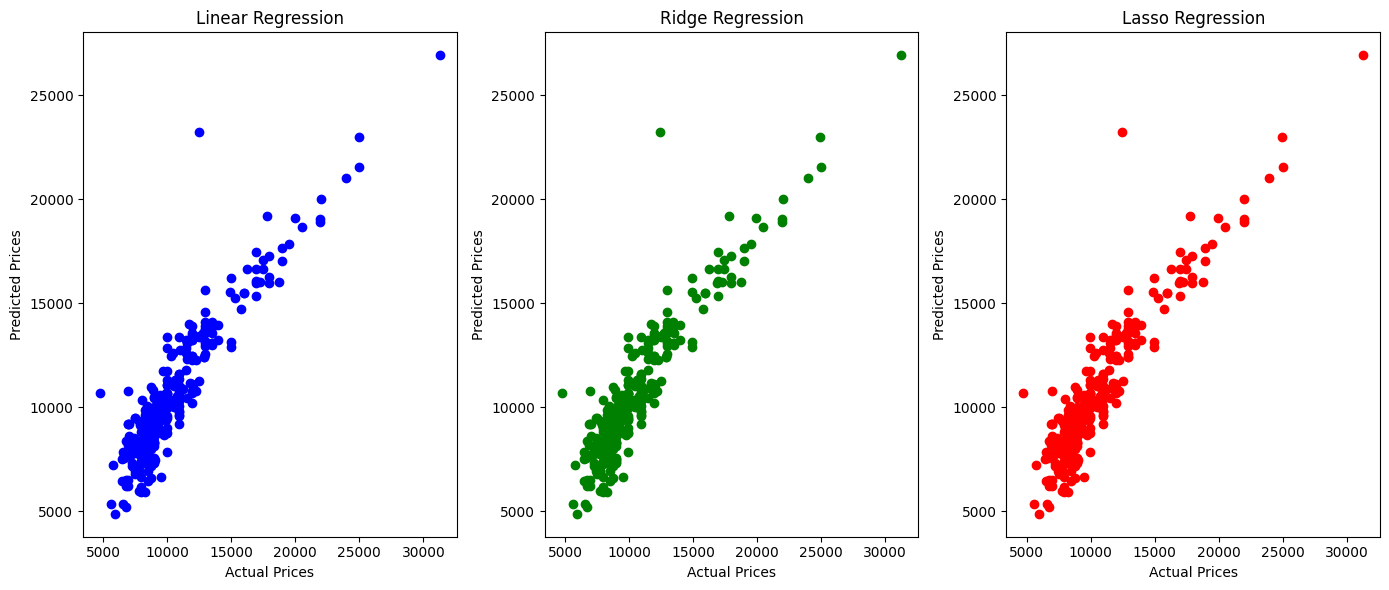

In [226]:
from sklearn.linear_model import Ridge, Lasso

# Model 2: Ridge Regression
ridge = Ridge(alpha=0.1)  # You can adjust the value of alpha
ridge.fit(X_train, y_train)

# Model 3: Lasso Regression
lasso = Lasso(alpha=0.1)  # You can adjust the value of alpha
lasso.fit(X_train, y_train)

# Predict car prices using these models
y_pred2 = ridge.predict(X_test)
y_pred3 = lasso.predict(X_test)

# Evaluate the models
evaluate_model(y_test, y_pred2, "Ridge Regression")
evaluate_model(y_test, y_pred3, "Lasso Regression")

# Display coefficients for each model
print("\nModel Coefficients:")
print(f"Linear Regression Coefficients: {model1.coef_}")
print(f"Ridge Regression Coefficients: {ridge.coef_}")
print(f"Lasso Regression Coefficients: {lasso.coef_}")

# Plot predictions vs actual prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred1, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression')

# Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred2, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Ridge Regression')

# Lasso Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred3, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Lasso Regression')

plt.tight_layout()
plt.show()


## **Prediction, Performance Metrics, Residual Analysis, and Coefficient Analysis**

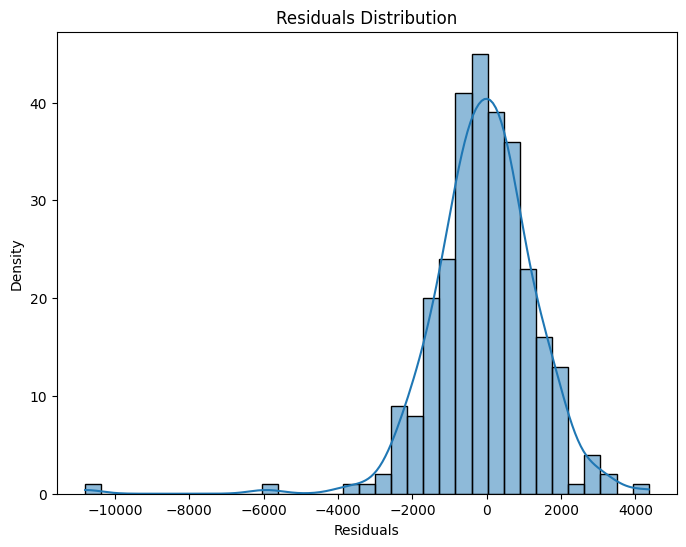

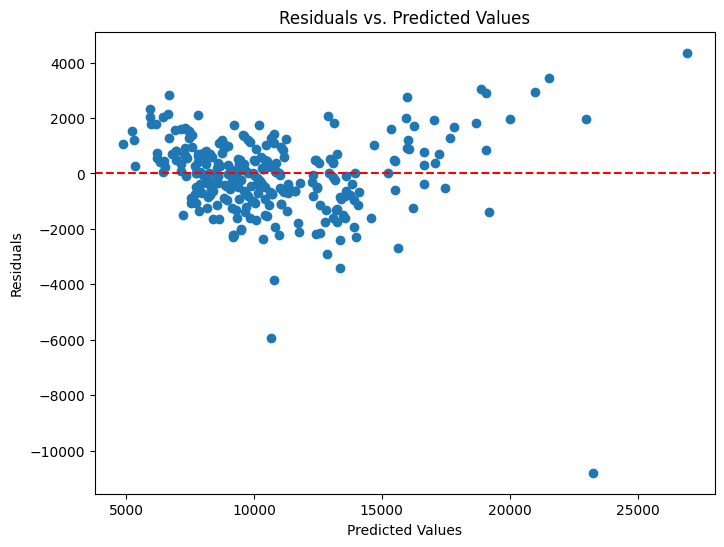

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1213.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        15:45:09   Log-Likelihood:                -9888.3
No. Observations:                1148   AIC:                         1.979e+04
Df Residuals:                    1141   BIC:                         1.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5557.2678   1097.981     -5.061      0.0

In [227]:
# Prediction
# Predict the target variable on the testing data
y_pred = regression.predict(X_test)

# Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Coefficient Analysis
# Use statsmodels to get detailed summary of the model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())


## **1. What is Normalization & Standardization and how is it helpful?**

**Normalization:** Normalization is the process of scaling numerical features to a range between 0 and 1. It involves subtracting the minimum value of the feature and then dividing by the range of the feature.

**Standardization:** Standardization (or z-score normalization) is the process of transforming numerical features to have a mean of 0 and a standard deviation of 1. It involves subtracting the mean of the feature and then dividing by the standard deviation of the feature.

In [228]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example: Normalize and Standardize features
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Normalize data
X_normalized = scaler_minmax.fit_transform(X)

# Standardize data
X_standardized = scaler_standard.fit_transform(X)


## **2. What techniques can be used to address multicollinearity in multiple linear regression?**

**Multicollinearity:** Multicollinearity occurs when two or more predictor variables in a multiple regression model are highly correlated with each other. This can lead to unstable coefficient estimates, making it difficult to interpret the effect of each variable on the target variable.

**Techniques to Address Multicollinearity -**   
*   **Feature Selection:** Remove one of the correlated variables from the model.
*   **Variance Inflation Factor (VIF):** Calculate the VIF for each predictor variable, which measures how much the variance of the estimated regression coefficients are inflated due to multicollinearity.


##**Implications of Assumptions:**
**Assumption:** It is assumed that the features are independent of each other in multiple linear regression. Multicollinearity violates this assumption.

**Implications:** Violations of the assumption may lead to misleading coefficient estimates and inaccurate interpretations of the relationships between predictor variables and the target variable.